# Packages

In [1]:
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
#For showing plots directly in the notebook run the command below
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches
import sys

from matplotlib.backends.backend_pdf import PdfPages

# Data Quality Report

## Head and Tail

In [2]:
# Convert csv into dataframes. Open file
df = pd.read_csv('CreditRisk-21466.csv',  keep_default_na=True, sep=',\s+', delimiter=',')
# Show data frame first five rows
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,61,246,20,95,18,2,2,86,11,...,38,0,1,1,62,-8,5,1,2,88
1,Good,72,156,2,53,16,2,0,89,50,...,37,-7,0,0,29,50,2,2,1,44
2,Bad,73,132,9,47,4,0,0,100,-7,...,75,-7,0,0,94,-8,1,1,1,100
3,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,Good,62,21,12,17,4,0,0,100,-7,...,50,0,4,3,120,83,1,2,1,75


In [3]:
# Show data frame last 5 rows
df.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Good,84,337,1,84,36,0,0,100,-7,...,16,0,2,2,3,100,6,2,0,53
996,Bad,66,74,15,49,7,2,0,60,9,...,40,0,0,0,0,20,1,2,-8,60
997,Good,71,439,1,186,19,1,1,100,-7,...,23,6,0,0,3,-8,2,1,0,43
998,Bad,77,154,1,47,22,0,0,100,-7,...,30,18,0,0,12,36,2,2,1,71
999,Bad,61,163,1,46,22,0,0,96,33,...,35,0,4,4,87,76,7,3,4,67


## All Types

In [4]:
# Show the data types in each column.
# int64 stands for numeric columns.
# The pandas type 'object' stands for Python strings
# Some of the type 'object' columns may be more appropriate as numeric/continuous or as categorical types.
# We first explore the data, then decide which columns should be treated as 'continuous' and which 
# should be treated as 'categorical'.
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

## Categorical Columns

In [5]:
# Select columns containing categorical data
categorical_columns = df[['RiskPerformance', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver']].columns

In [6]:
# Select columns containing categorical data and Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden                 int64
NumRevolvingTradesWBalance               int64
NumInstallTra

## Continous Columns

In [7]:
# Select columns containing continuous data
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile',
                        'NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec',
                         'PercentTradesNeverDelq','MSinceMostRecentDelq',
                         'NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days',
                        'NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden',
                        'NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization',
                        'PercentTradesWBalance']].columns

# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,1000.0,66.862,22.324994,-9.0,63.00,71.0,80.00,92.0
MSinceOldestTradeOpen,1000.0,185.972,114.991470,-9.0,116.75,177.0,254.00,589.0
MSinceMostRecentTradeOpen,1000.0,8.184,11.121233,-9.0,3.00,6.0,11.00,95.0
AverageMInFile,1000.0,73.821,40.192243,-9.0,50.75,74.0,95.25,258.0
NumSatisfactoryTrades,1000.0,18.925,12.548101,-9.0,12.00,19.0,27.00,74.0
NumTrades60Ever2DerogPubRec,1000.0,-0.034,2.635107,-9.0,0.00,0.0,1.00,19.0
NumTrades90Ever2DerogPubRec,1000.0,-0.197,2.516848,-9.0,0.00,0.0,0.00,19.0
PercentTradesNeverDelq,1000.0,86.249,26.915785,-9.0,87.00,96.0,100.00,100.0
MSinceMostRecentDelq,1000.0,6.051,19.857510,-9.0,-7.00,-7.0,12.00,81.0
NumTotalTrades,1000.0,19.854,13.935885,-9.0,12.00,20.0,28.00,84.0


In [8]:
# Descriptive stats for continuous features
# df.describe() by default only prints stats for the numeric columns int64 and float64.
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.862000,185.97200,8.184000,73.821000,18.925000,-0.034000,-0.197000,86.249000,6.05100,19.854000,...,31.225000,-0.68400,0.714000,0.662000,30.643000,37.921000,2.984000,0.833000,0.052000,60.662000
std,22.324994,114.99147,11.121233,40.192243,12.548101,2.635107,2.516848,26.915785,19.85751,13.935885,...,20.426346,6.07248,3.122492,3.081761,29.840711,41.500085,4.348408,4.096571,3.346116,27.785784
min,-9.000000,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,...,-9.000000,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,116.75000,3.000000,50.750000,12.000000,0.000000,0.000000,87.000000,-7.00000,12.000000,...,18.000000,-7.00000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,46.000000
50%,71.000000,177.00000,6.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.00000,20.000000,...,30.000000,0.00000,1.000000,1.000000,24.000000,45.000000,3.000000,2.000000,0.000000,63.000000
75%,80.000000,254.00000,11.000000,95.250000,27.000000,1.000000,0.000000,100.000000,12.00000,28.000000,...,43.000000,1.00000,2.000000,2.000000,52.000000,78.000000,5.000000,3.000000,1.000000,80.250000
max,92.000000,589.00000,95.000000,258.000000,74.000000,19.000000,19.000000,100.000000,81.00000,84.000000,...,100.000000,23.00000,18.000000,18.000000,165.000000,138.000000,17.000000,13.000000,13.000000,100.000000


In [9]:
# Descriptive stats for continuous features
# Transpose the table so one feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# This Table does not show the cardinality and the %Missing columns if any.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,1000.0,66.862,22.324994,-9.0,63.00,71.0,80.00,92.0
MSinceOldestTradeOpen,1000.0,185.972,114.991470,-9.0,116.75,177.0,254.00,589.0
MSinceMostRecentTradeOpen,1000.0,8.184,11.121233,-9.0,3.00,6.0,11.00,95.0
AverageMInFile,1000.0,73.821,40.192243,-9.0,50.75,74.0,95.25,258.0
NumSatisfactoryTrades,1000.0,18.925,12.548101,-9.0,12.00,19.0,27.00,74.0
NumTrades60Ever2DerogPubRec,1000.0,-0.034,2.635107,-9.0,0.00,0.0,1.00,19.0
NumTrades90Ever2DerogPubRec,1000.0,-0.197,2.516848,-9.0,0.00,0.0,0.00,19.0
PercentTradesNeverDelq,1000.0,86.249,26.915785,-9.0,87.00,96.0,100.00,100.0
MSinceMostRecentDelq,1000.0,6.051,19.857510,-9.0,-7.00,-7.0,12.00,81.0
NumTotalTrades,1000.0,19.854,13.935885,-9.0,12.00,20.0,28.00,84.0


In [10]:
#Keep only the numeric features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
for i in range(len(numeric_columns)):
    if i < 10:
        print(i, " : ", numeric_columns[i])
    else:
        print(i, ": ", numeric_columns[i])

0  :  ExternalRiskEstimate
1  :  MSinceOldestTradeOpen
2  :  MSinceMostRecentTradeOpen
3  :  AverageMInFile
4  :  NumSatisfactoryTrades
5  :  NumTrades60Ever2DerogPubRec
6  :  NumTrades90Ever2DerogPubRec
7  :  PercentTradesNeverDelq
8  :  MSinceMostRecentDelq
9  :  NumTotalTrades
10 :  NumTradesOpeninLast12M
11 :  PercentInstallTrades
12 :  MSinceMostRecentInqexcl7days
13 :  NumInqLast6M
14 :  NumInqLast6Mexcl7days
15 :  NetFractionRevolvingBurden
16 :  NetFractionInstallBurden
17 :  NumRevolvingTradesWBalance
18 :  NumInstallTradesWBalance
19 :  NumBank2NatlTradesWHighUtilization
20 :  PercentTradesWBalance


## Checking for duplicates

In [11]:
# Checking for duplicated rows
print(df.index.get_duplicates())

Int64Index([], dtype='int64')


C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


In [12]:
# Checking for duplicated columns
print(df.index.T.get_duplicates())

Int64Index([], dtype='int64')


C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


In [13]:
# another way to check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 61
Duplicate columns: 0


## Drop duplicates

In [14]:
# Drops all duplicates including the originals
df.drop_duplicates(keep = False, inplace = True)

In [15]:
df.shape

(937, 24)

## Check for Null values

In [16]:
#Missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
# When summing data, NA (missing) values will be treated as zero
# If the data are all NA, the result will be NA
# Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

#Missing data all features
df.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

## Descriptive stats for continous features

In [17]:
# Descriptive stats for continuous features
# Transpose the table so one feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# This Table does not show the cardinality and the %Missing columns if any.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,937.0,71.962647,10.888013,-9.0,64.0,72.0,81.0,92.0
MSinceOldestTradeOpen,937.0,199.081110,106.688228,-8.0,131.0,184.0,259.0,589.0
MSinceMostRecentTradeOpen,937.0,9.339381,10.525918,0.0,3.0,6.0,12.0,95.0
AverageMInFile,937.0,79.389541,35.091590,7.0,56.0,76.0,97.0,258.0
NumSatisfactoryTrades,937.0,20.802561,10.584745,1.0,13.0,20.0,27.0,74.0
NumTrades60Ever2DerogPubRec,937.0,0.568837,1.279277,0.0,0.0,0.0,1.0,19.0
NumTrades90Ever2DerogPubRec,937.0,0.394877,1.092855,0.0,0.0,0.0,0.0,19.0
PercentTradesNeverDelq,937.0,92.653148,11.023783,29.0,89.0,97.0,100.0,100.0
MSinceMostRecentDelq,937.0,7.062967,20.114397,-8.0,-7.0,0.0,13.0,81.0
NumTotalTrades,937.0,21.794023,12.143957,0.0,13.0,20.0,29.0,84.0


A non zero std or standard deviation implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.

## Write dataframe to csv file

In [18]:
# Write the dataframe to a csv file
df.to_csv('CreditRisk_Clean.csv', index=False)

## - Prepare a table with descriptive statistics for all the continuous features.

In [19]:
# Print table with descriptive statistics for all the continuous features
df.select_dtypes(['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,937.0,71.962647,10.888013,-9.0,64.0,72.0,81.0,92.0
MSinceOldestTradeOpen,937.0,199.081110,106.688228,-8.0,131.0,184.0,259.0,589.0
MSinceMostRecentTradeOpen,937.0,9.339381,10.525918,0.0,3.0,6.0,12.0,95.0
AverageMInFile,937.0,79.389541,35.091590,7.0,56.0,76.0,97.0,258.0
NumSatisfactoryTrades,937.0,20.802561,10.584745,1.0,13.0,20.0,27.0,74.0
NumTrades60Ever2DerogPubRec,937.0,0.568837,1.279277,0.0,0.0,0.0,1.0,19.0
NumTrades90Ever2DerogPubRec,937.0,0.394877,1.092855,0.0,0.0,0.0,0.0,19.0
PercentTradesNeverDelq,937.0,92.653148,11.023783,29.0,89.0,97.0,100.0,100.0
MSinceMostRecentDelq,937.0,7.062967,20.114397,-8.0,-7.0,0.0,13.0,81.0
NumTotalTrades,937.0,21.794023,12.143957,0.0,13.0,20.0,29.0,84.0


## - Prepare a table with descriptive statistics for all the categorical features.

In [20]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,937,2,Bad,484
MaxDelq2PublicRecLast12M,937,9,7,414
MaxDelqEver,937,7,8,434


## - Plot histograms for all the continuous features.

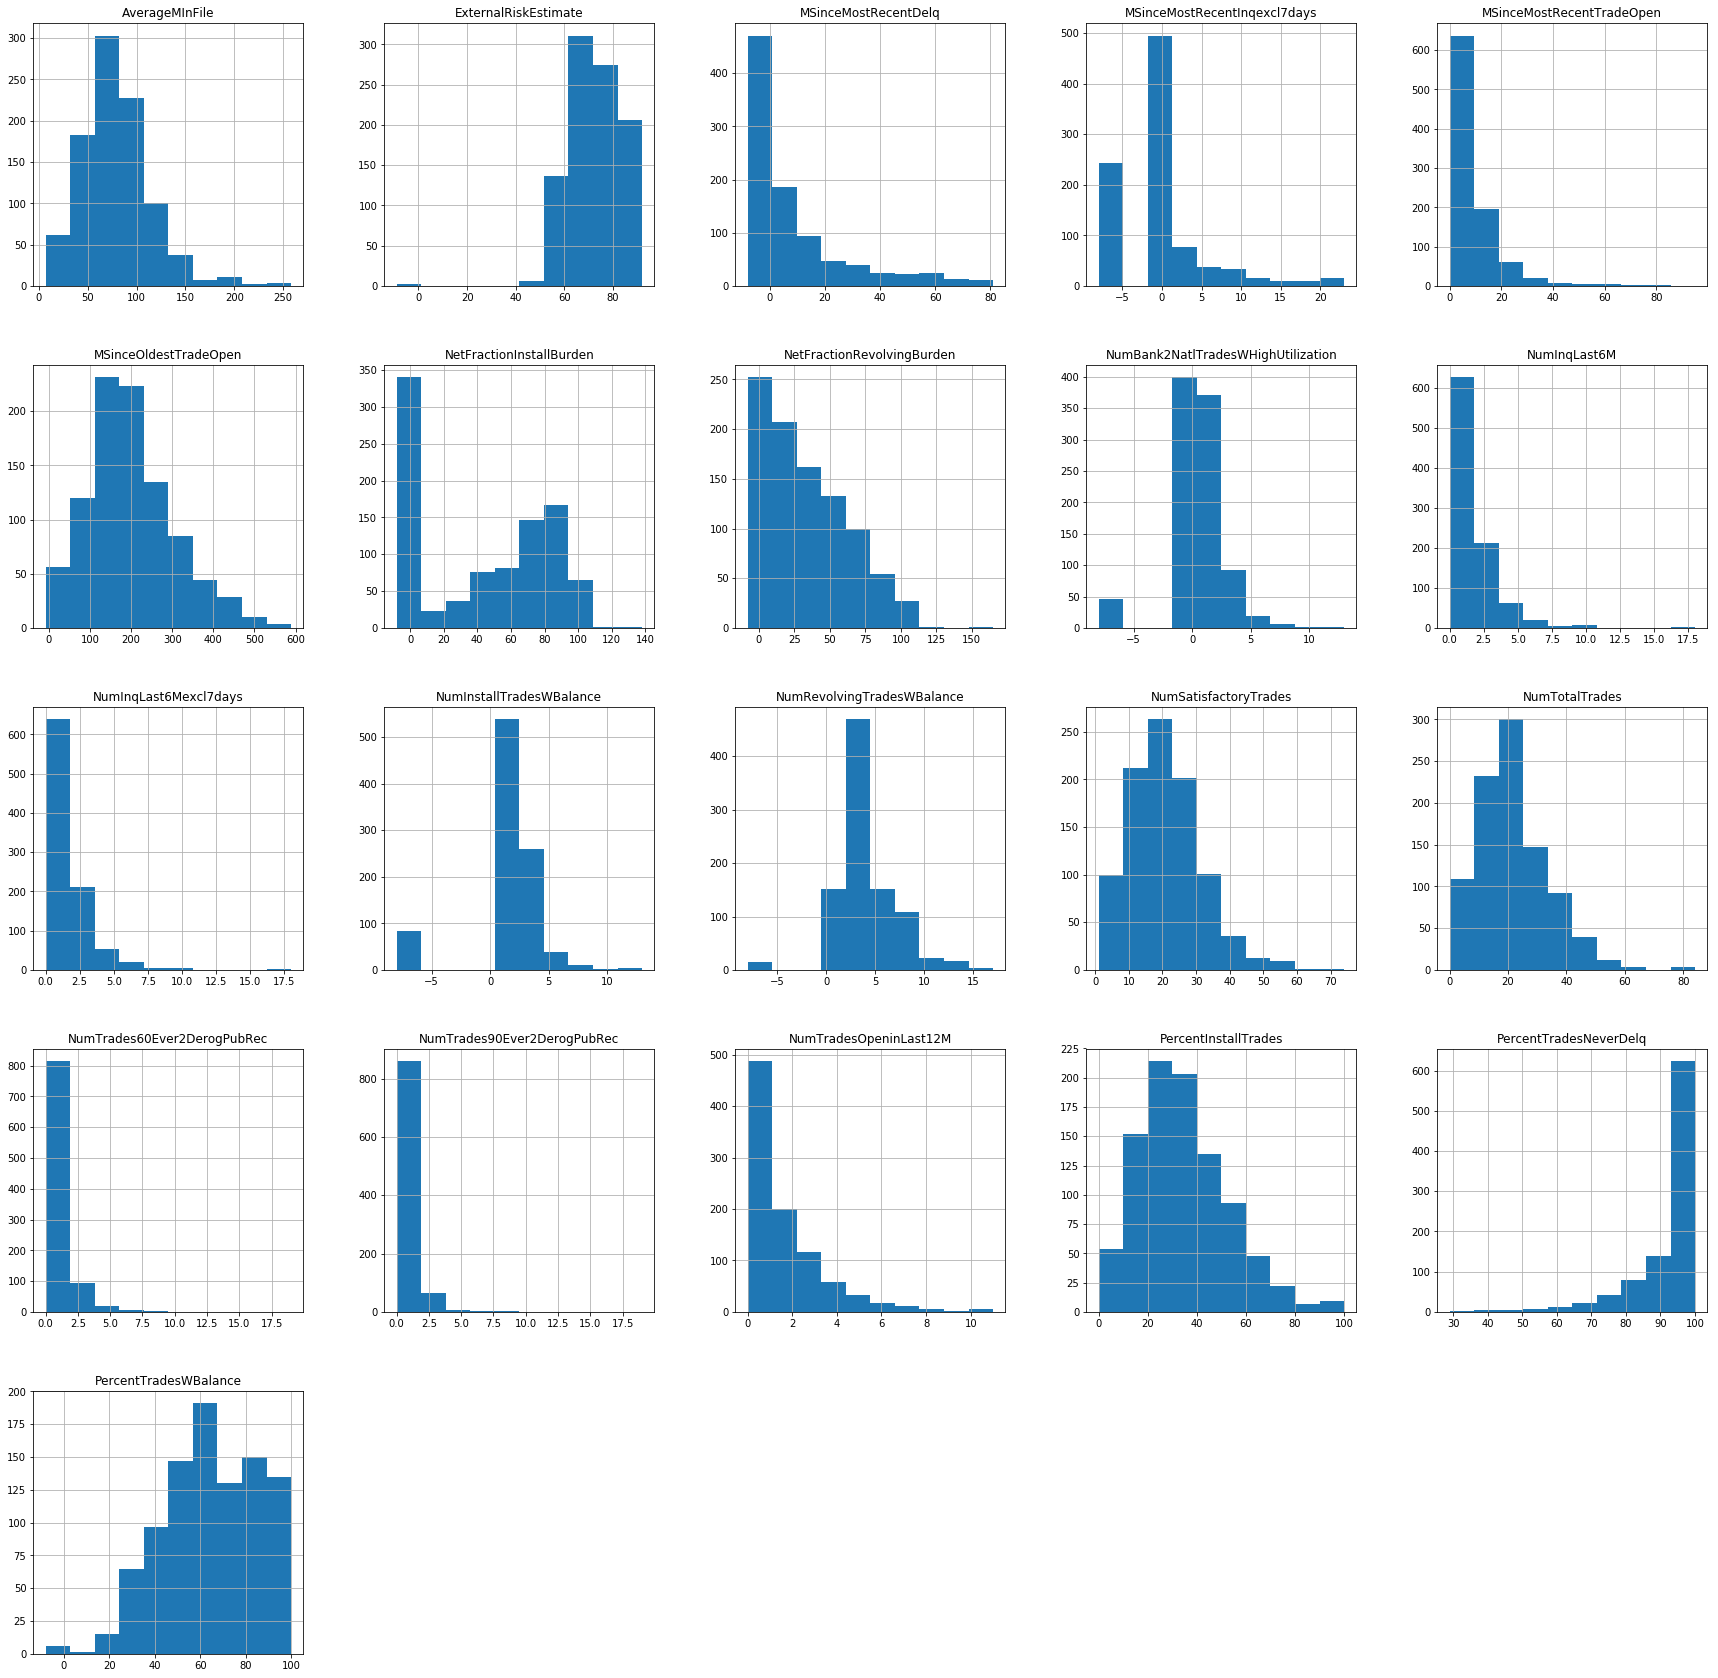

In [21]:
# Plot a histogram of the continuous features (and save in a png file)
df[continuous_columns].hist(figsize=(30,30))
plt.savefig('continuous_histograms_1-1.pdf')

## - Plot box plots for all the continuous features.

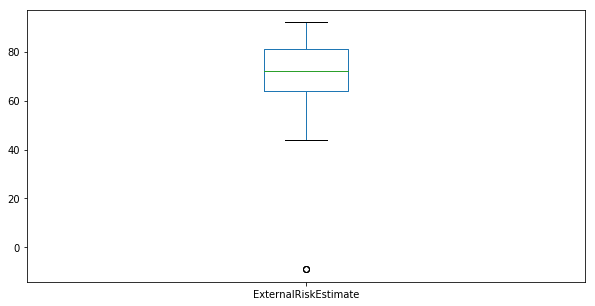

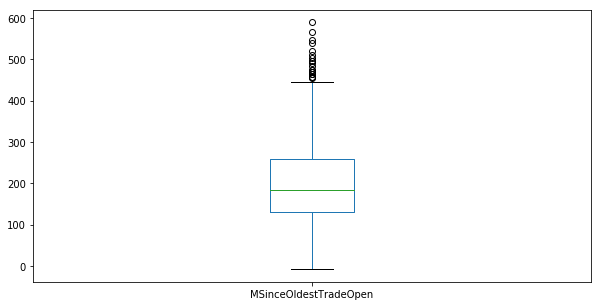

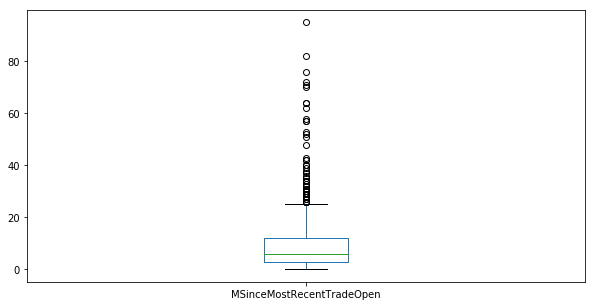

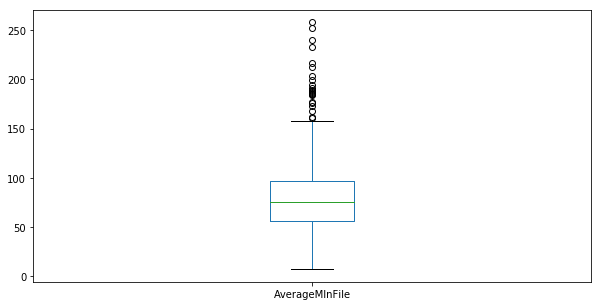

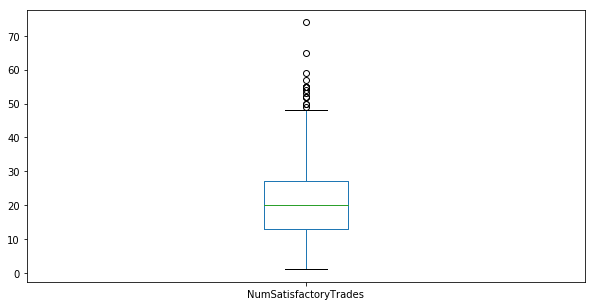

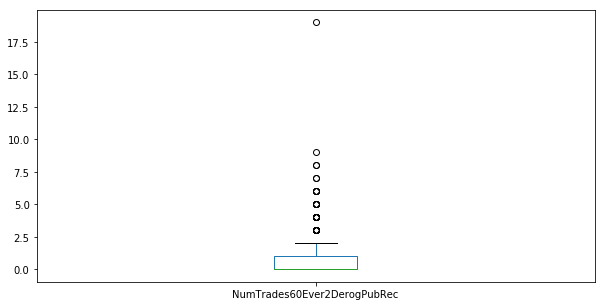

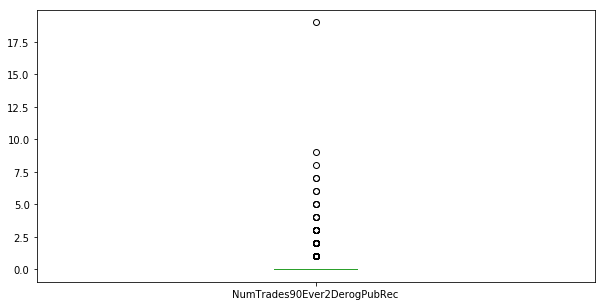

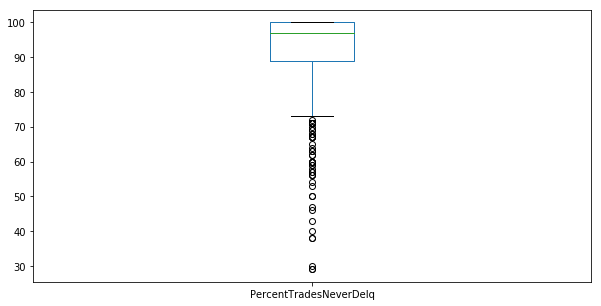

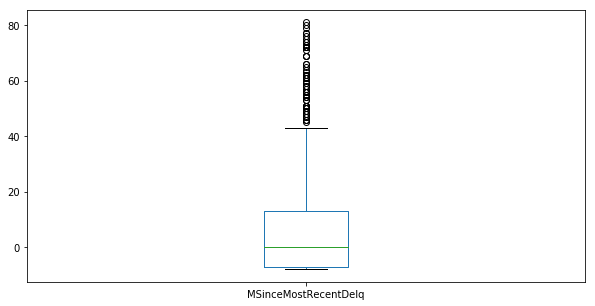

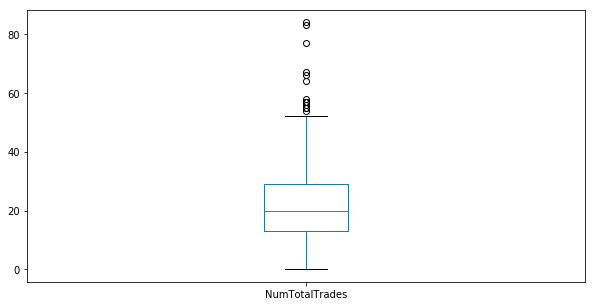

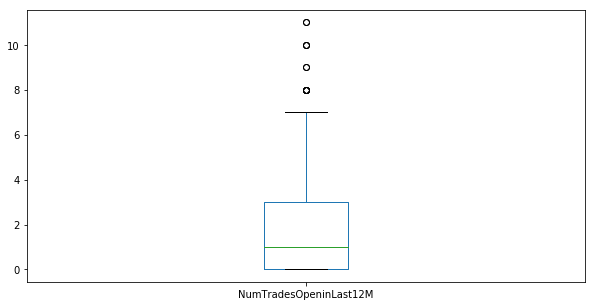

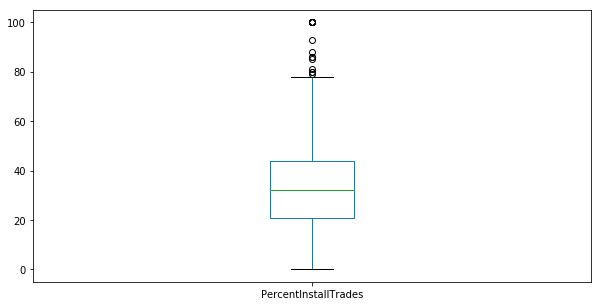

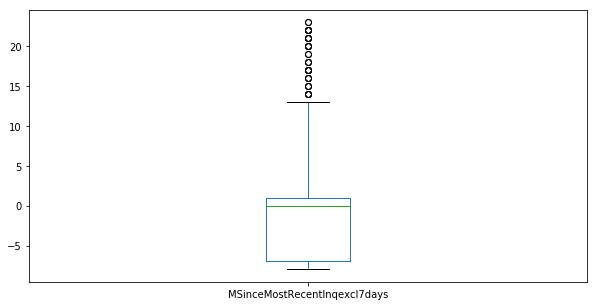

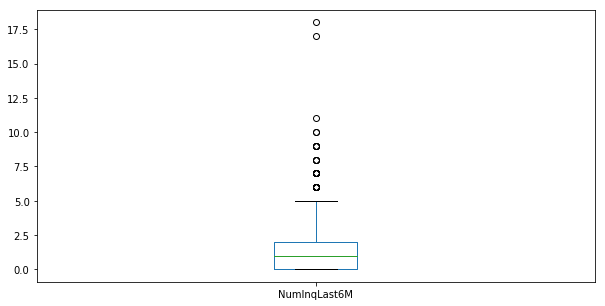

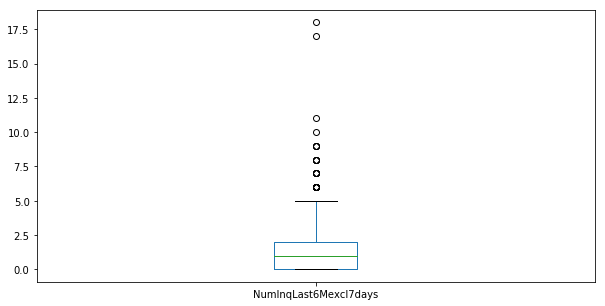

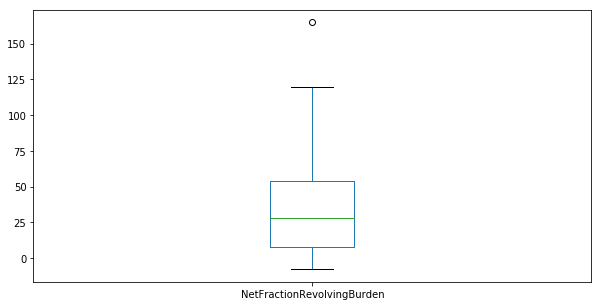

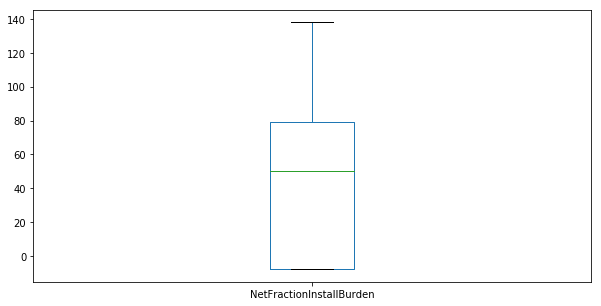

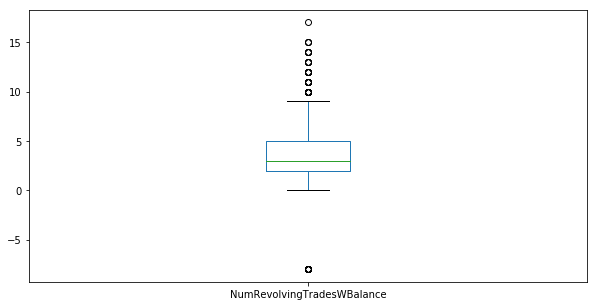

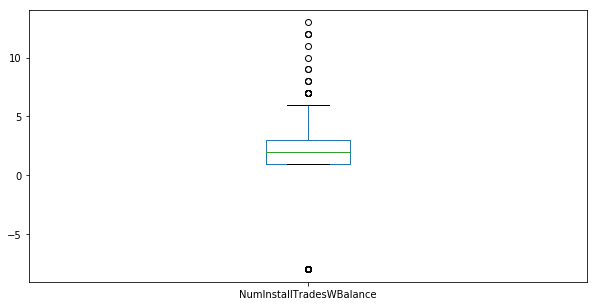

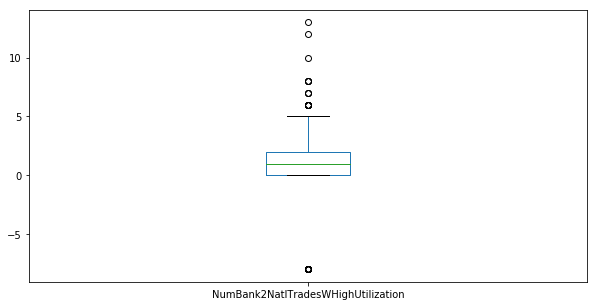

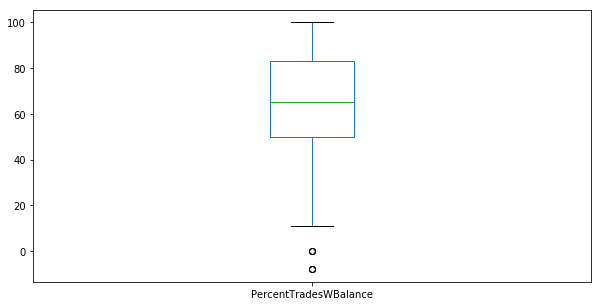

In [22]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_boxplots_1-1.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

In [23]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_barcharts_1-1.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

OSError: [Errno 22] Invalid argument: 'categorical_barcharts_1-1.pdf'

## Initial Findings:

The discussion can be found in a pdf file called **Data_Quality_Report_Initial_Findings.pdf**

# Data quality plan for the cleaned CSV file.

## - Mark down all the features where there are potential problems or data quality issues.

The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- MSinceOldestTradeOpen with many high outlyers in boxplot chart
- MSinceMostRecentTradeOpen with may high outlyers in boxplot chart
- AverageMinFile with many high outlyers in boxplot chart
- NumSatisfactoryTrades with some high outlyers in boxplot chart
- MSinceMostRecentDelq with many high outlyers in boxplot chart
- PercentTradesNever Delq with many negative outlyers in boxplot chart
- NumTrades90Ever2DerogPubRec showing only 50 percentile and not showing max or min in boxplot chart
- MSinceMostRecentInqexcl7days in bar chart showing sizeable negative bar separated from rest of values
- Negative values show additionally to MSinceMostRecentInqexcl7days in the following bar charts:
    ExternalRiskEstimate, 
    NumBank2NatlTradesWHighUtilization, 
    NumInstallTradesWBalance, 
    NumRevolvingTradesWBalance, 
    NumSatisfactoryTrades, 
    NumTotalTrades, 
    NumTradesOpeninLast12M, 
    PercentTradesWBalance 
- All above points from 2.14.1 to 2.14.10 may be due to the below point numbered 2.14.12 and a possible solution may be to act according to below point number 2.14.13
- Many attributes showing negative values of -7, -8 or -9. These negative values would possibly have an inpact in the descriptive statistics of the continuous attributes. However these values are defined in the data dictionary as follows:


## In adition to the problems above, I'll perform some standard checks to find any aditional issues:

### Negative values in MSinceMostRecentInqexcl7days

In [ ]:
# Check negative values in MSinceMostRecentInqexcl7days to assess and show inpact on attribute - impact is below 25% in this
# attribute therefore will not remove the attribute - MSinceMostRecentInqexcl7days used as example

temp_df = df[df['MSinceMostRecentInqexcl7days'] <= -7]
print(temp_df.MSinceMostRecentInqexcl7days.count())

In [ ]:
# Display descriptive stats for MSinceMostRecentInqexcl7days before amendment of negative values to give a 
# snap shot of their inpact

df['MSinceMostRecentInqexcl7days'].describe().T

In [ ]:
# Remove all the negative values in the dataframe in all attributes
df = df.replace(-7, 0)
df = df.replace(-8, 0)
df = df.replace(-9, 0)

In [ ]:
# show all negative values removed using MSinceMostRecentInqexcl7days as example
temp_df = df[df['MSinceMostRecentInqexcl7days'] <= -7]
print(temp_df.MSinceMostRecentInqexcl7days.count())

In [ ]:
# Display descriptive stats for MSinceMostRecentInqexcl7days as example after amendment of negative values
df['MSinceMostRecentInqexcl7days'].describe().T

Descriptive stats for MSinceMostRecentInqexcl7days after the negative values have been changed to 0 have changed:
mean from -0.124867 to 1.754536 the 25 percentile has changed from -7 to 0 and the standard deviation has gone from 5.864240 to 4.200064. I believe these stats are more realistic now.

## Check for Irregular cardinalities

In [ ]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- RiskPerfomance:", pd.unique(df.RiskPerformance.ravel()))
print("Unique values for:\n- MaxDelq2PublicRecLast12M:", pd.unique(df.MaxDelq2PublicRecLast12M.ravel()))
print("Unique values for:\n- MaxDelqEver:", pd.unique(df.MaxDelqEver.ravel()))

In [ ]:
## Check PercentTradesNeverDelq against other attributes to explore relationship with RiskPerformance
df[df['PercentTradesNeverDelq'] == 100][df['RiskPerformance'] == 'Bad'][['RiskPerformance','PercentTradesNeverDelq', 'NumTotalTrades', 'MaxDelqEver', 'NumSatisfactoryTrades']]

The study between the above attributes highlights the inconsistencies in the data as there are 166 trades with 100% positive performance however these have been given a Bad RiskPerformance. The only observation that I can deduce from this inconsistency is that there is further data on the trade which affects the RiskPerformance. This extra information could be related in a personal or non financial manner to the person or entity which has opened the trade. For example spending habits of the person that opened the trade. 

In [ ]:
# Check if NumSatisfactoryTrades is bigger than NumTotalTrades and given a 'bad' RiskPerformance to ascertain issues
# with the data 
df[df['NumSatisfactoryTrades'] > df['NumTotalTrades']][df['RiskPerformance'] == 'Bad'][['NumTotalTrades', 'NumSatisfactoryTrades', 'RiskPerformance' ]]

In the above comparison there are 77 rows with more Satisfactory Trades than total number of trades therefore we point another inconsistency in the data provided to us - these have all been given a 'Bad' RiskPerformance. Again the question is to be asked as to whether there is further information for this 'Bad' RiskPerformance given and or the veracity of the data in use. 

## Data quality plan

In [ ]:
# Select columns containing categorical data as RiskPerformance and MaxDelqEver change back to object and int64
categorical_columns = df[['RiskPerformance', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver']].columns

In [ ]:
# Select columns containing categorical data and Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
df.dtypes

### Summary of data quality plan:
   
| Feature                            | Data Quality Issue    | Handling Strategy            |
|-------------------------           |---------------------- |------------------------------|
|MSinceOldestTradeOpen               |high outlyers          | Do Nothing                   |
|MSinceMostRecentTradeOpen           |high outlyers          | Do Nothing                   |
|AverageMinFile                      |high outlyers          | Do Nothing                   |
|NumSatisfactoryTrades               |high outlyers          | Do Nothing                   |
|MSinceMostRecentDelq                |high outlyers          | Do Nothing                   |
|PercentTradesNeverDelq              |negative outlyers      | Change negatives to 0        |
|NumTrades90Ever2DerogPubRec         |missing info in boxplot| Do Nothing                   |
|MSinceMostRecentInqexcl7days        |Many negative values   | Remove negative values       |
|ExternalRiskEstimate                |showing negative values| Change negatives to 0        |
|NumBank2NatlTradesWHighUtilization  |showing negative values| Change negatives to 0        |
|NumInstallTradesWBalance            |showing negative values| Change negatives to 0        |
|NumRevolvingTradesWBalance          |showing negative values| Change negatives to 0        |
|NumSatisfactoryTrades               |showing negative values| Change negatives to 0        |
|NumTotalTrades                      |showing negative values| Change negatives to 0        |
|NumTradesOpeninLast12M              |showing negative values| Change negatives to 0        |
|PercentTradesWBalance               |showing negative values| Change negatives to 0        |


### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

In [ ]:
# Print table with descriptive statistics for all the continuous features
df.select_dtypes(['float64', 'int64']).describe().T

In [ ]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

In [ ]:
# Write the dataframe to a csv file
df.to_csv('CreditRisk_1-2_cleaned.csv', index=False)

# Exploring relationships between feature pairs:

## - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following continuous features:
- NumTotalTrades
- NumSatisfactoryTrades
- NumTrades60Ever2DerogPubRec
- NumTrades90Ever2DerogPubRec
- PercentTradesNeverDelq
- ExternalRiskEstimate

and the following categorical features:
- RiskPerformance
- MaxDelq2PublicRecLast12M
- MaxDelqEver

I have taken these attributes as choices based on the idea that these particular features affect the outcome of the credit risk to the person or entity.

## Correlations for the numeric features

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

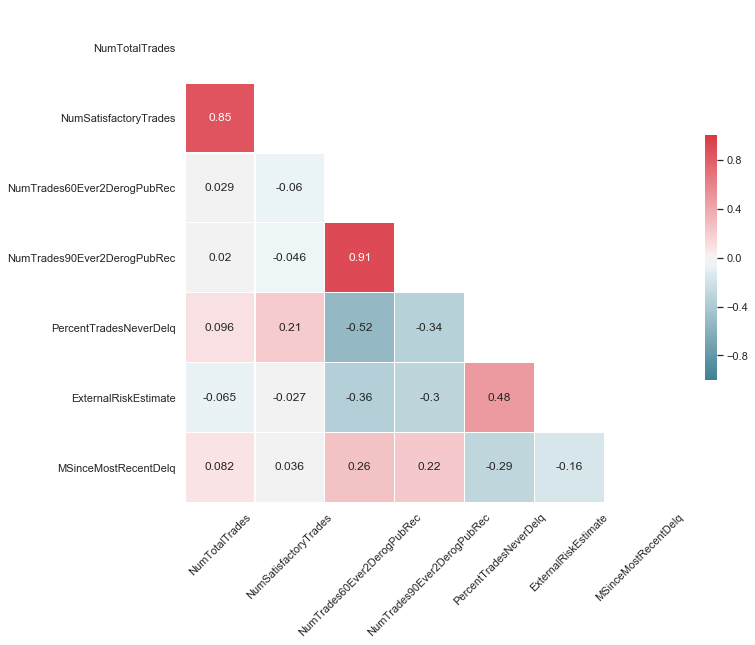

In [27]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df[['NumTotalTrades','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq', 'ExternalRiskEstimate', 'MSinceMostRecentDelq']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [ ]:
df.plot(kind='scatter', x='NumSatisfactoryTrades', y='NumTotalTrades')
df.plot(kind='scatter', x='NumTrades60Ever2DerogPubRec', y='NumTrades90Ever2DerogPubRec')
df.plot(kind='scatter', x='MSinceMostRecentDelq', y='NumTrades60Ever2DerogPubRec')
df.plot(kind='scatter', x='ExternalRiskEstimate', y='PercentTradesNeverDelq')

Plots indicate in the first two graphs that the attributes are lineraly correlated as with more trades there are more satisfactory trades as shown in scatter plot chart 1. Likewise in scatter plot chart 2 we find a linear correlation with the likely explanation that if someone is delinquent over 60 months they tend to continue to be delinquent reaching the 90 month mark. The other graphs show that other values are only slightly correlated.

## Categorical feature plots

(0, 100)

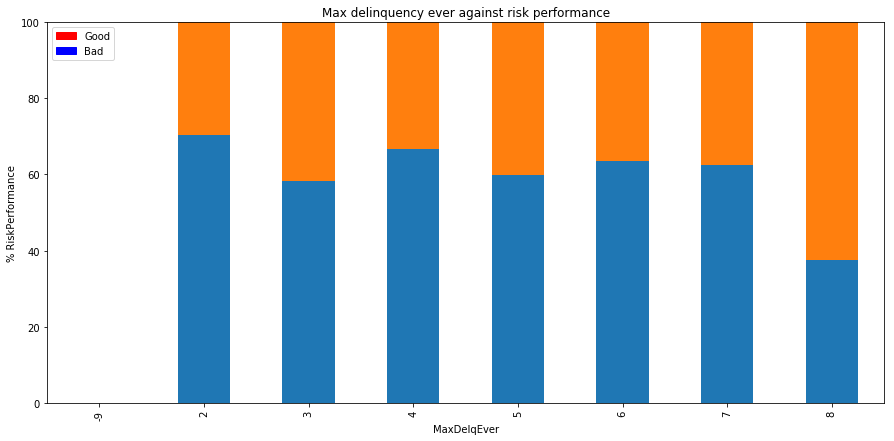

In [25]:
#Using code from the module lab
maximum = pd.unique(df.MaxDelqEver.ravel())

df['percent'] = 0

for i in maximum:
    count = 1 / df[df.MaxDelqEver == i].count()['RiskPerformance']
    index_list = df[df['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','MaxDelqEver','RiskPerformance']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Max delinquency ever against risk performance", figsize=(15,7))

red_patch = mpatches.Patch(color='red', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("MaxDelqEver")
my_plot.set_ylabel("% RiskPerformance")
my_plot.set_ylim([0,100])

Seems like these plots don't give any further usefull information to what has already been described

## Continuous-categorical feature plots

<Figure size 432x288 with 0 Axes>

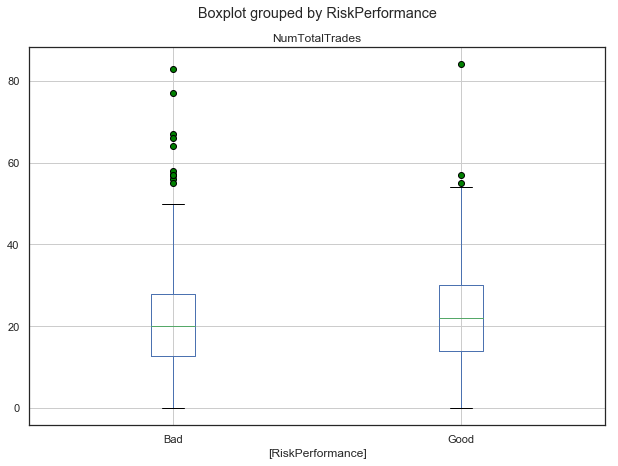

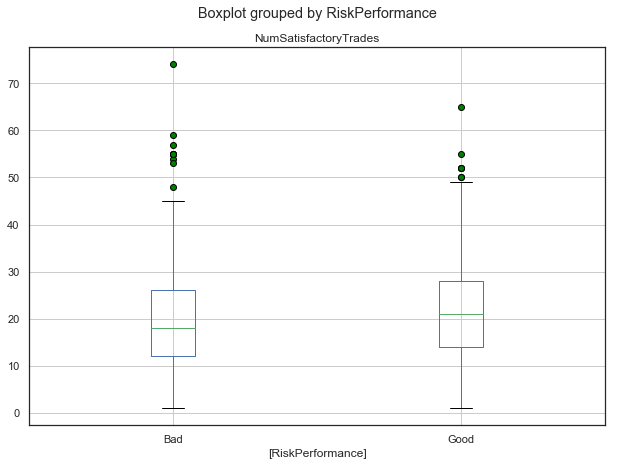

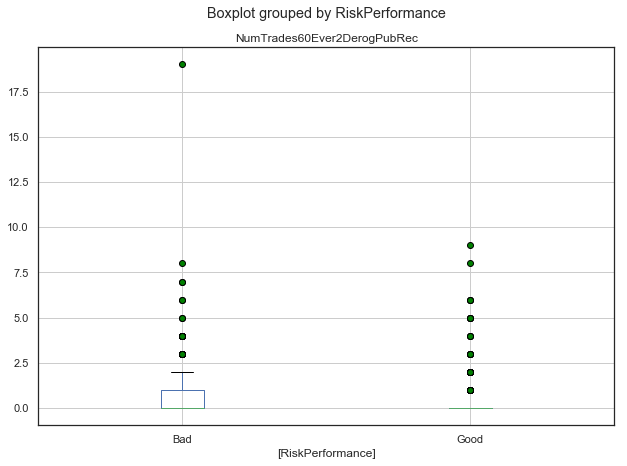

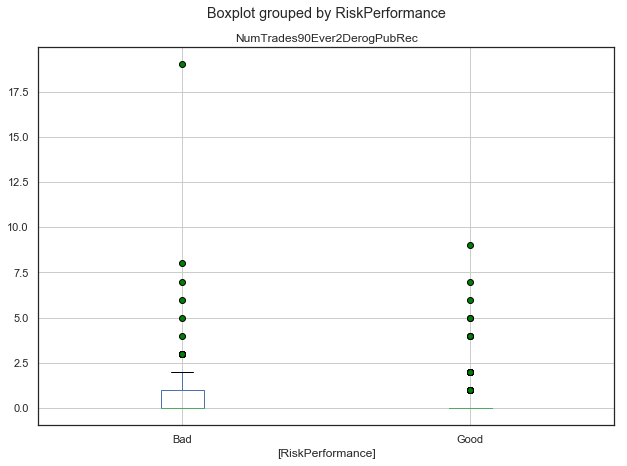

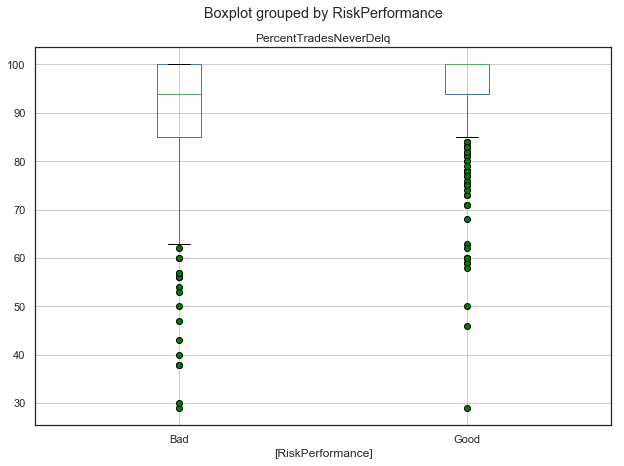

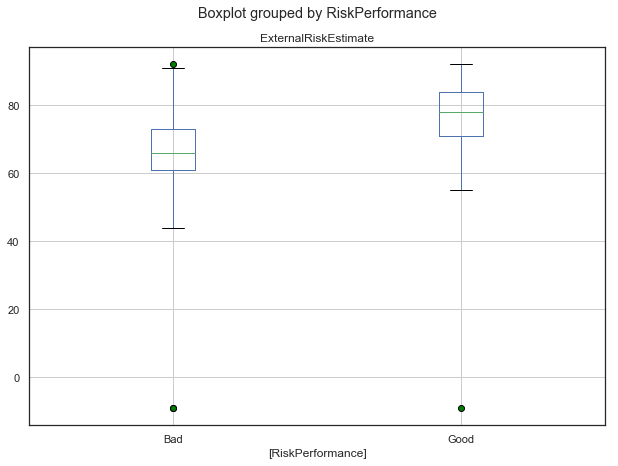

In [28]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['NumTotalTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumSatisfactoryTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumTrades60Ever2DerogPubRec'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumTrades90Ever2DerogPubRec'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['PercentTradesNeverDelq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['ExternalRiskEstimate'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B65173198>]],
      dtype=object)

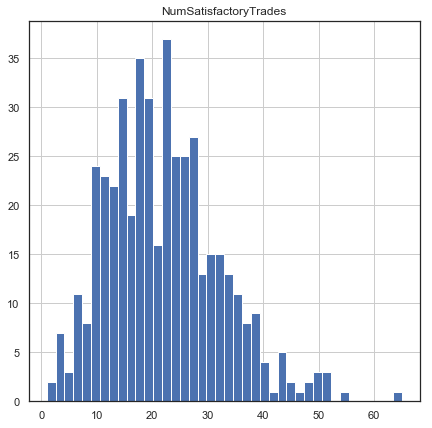

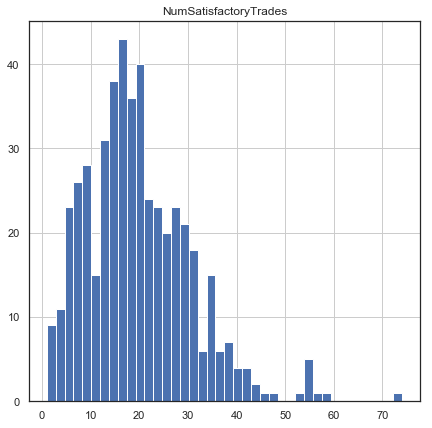

In [30]:
df[df['RiskPerformance'] == 'Good'][['NumSatisfactoryTrades']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['NumSatisfactoryTrades']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B65F79E48>]],
      dtype=object)

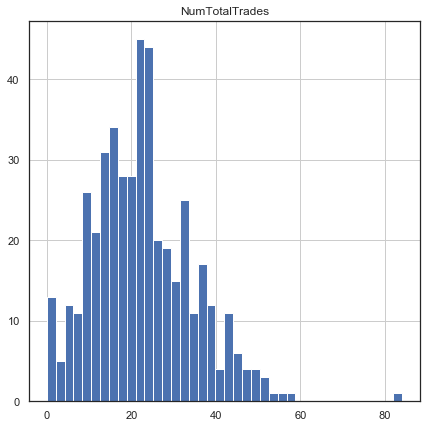

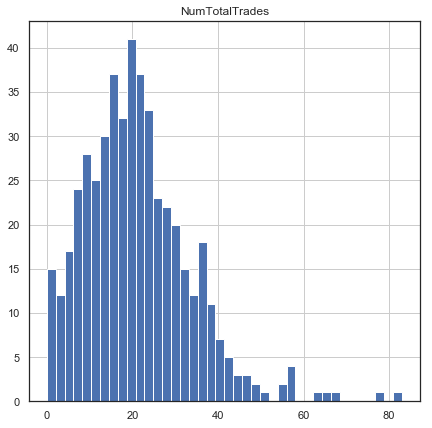

In [31]:
df[df['RiskPerformance'] == 'Good'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B648B05F8>]],
      dtype=object)

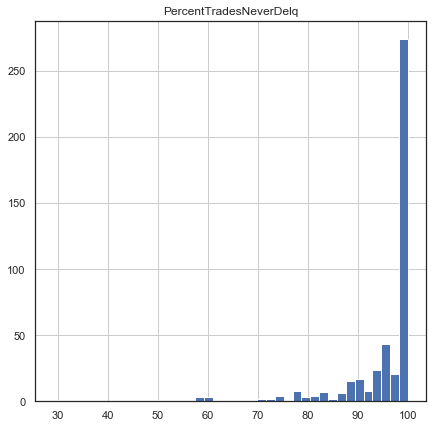

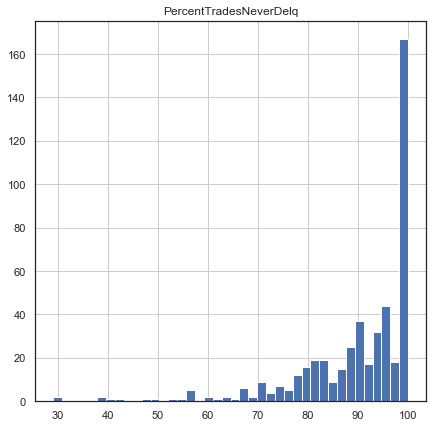

In [32]:
df[df['RiskPerformance'] == 'Good'][['PercentTradesNeverDelq']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['PercentTradesNeverDelq']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B64EAACC0>]],
      dtype=object)

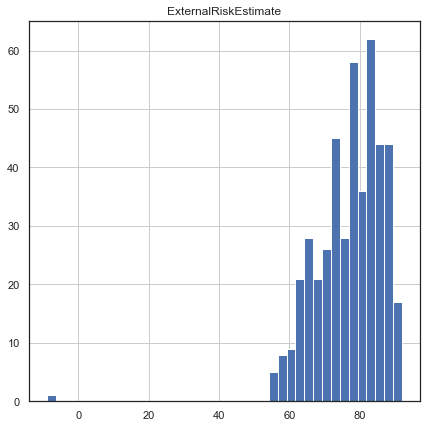

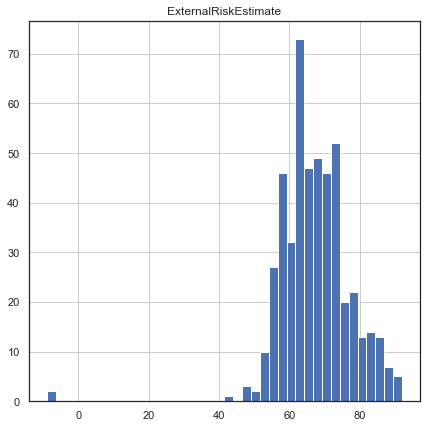

In [33]:
df[df['RiskPerformance'] == 'Good'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)